# Diwali Data Project Notebook

This notebook will guide you through the process of cleaning and analyzing a Diwali sales or event dataset. Follow each section to apply best practices in data cleaning and analysis.

## 1. Import Required Libraries
Import the necessary libraries for data analysis and cleaning.

In [20]:
import numpy as np
import pandas as pd
import re
from word2number import w2n
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Load the Data
Read your Diwali dataset (CSV or Excel) into a pandas DataFrame. Update the file path as needed.

In [21]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='latin1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Getting the information of dataset 
and then in next cell we remove two columns that are not in our used


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Removing the unwanted columns
we remove two columns that are not in used and are empty

In [23]:
# removing two columns that are not in our used  Status , unnamed1 
df = df.drop(['Status', 'unnamed1'], axis=1) 

## 3. Explore the Data
Check the shape, info, and preview the data to understand its structure and spot issues.

In [24]:
# print(df.shape)
# # print(df.info())
# print(df.head())
# Check for missing values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [25]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

## 4. Filling the amount nan with mean
to ensure the data will be full and correct

In [26]:
#filling missing values of Amount column with mean of Amount column
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())
print(df.shape)




(11251, 13)


# Again checking the values information 
checking the values now after filling amout with mean

In [27]:
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11251 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


## 7. Convert the amount from float to int Data Type
Ensure columns like 'Amount' are numeric for analysis.

In [28]:
df.Amount = df.Amount.astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11251 non-null  int64 
 1   Cust_name         11251 non-null  object
 2   Product_ID        11251 non-null  object
 3   Gender            11251 non-null  object
 4   Age Group         11251 non-null  object
 5   Age               11251 non-null  int64 
 6   Marital_Status    11251 non-null  int64 
 7   State             11251 non-null  object
 8   Zone              11251 non-null  object
 9   Occupation        11251 non-null  object
 10  Product_Category  11251 non-null  object
 11  Orders            11251 non-null  int64 
 12  Amount            11251 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


# Now there we will perform EDA 
analyse the data and making the carts of it

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

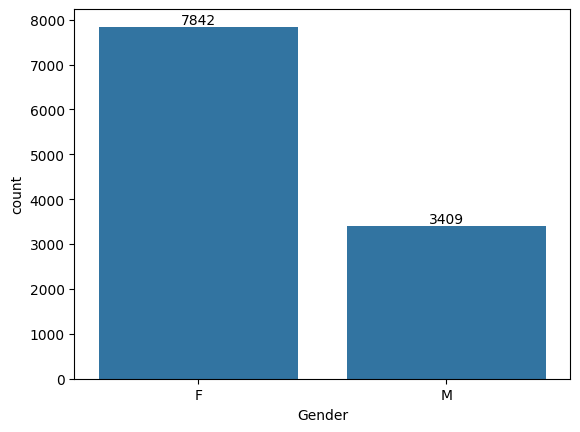

In [31]:
# plotting the graph 
ax = sns.countplot(x='Gender', data=df)
# counting the number of male and females
for bar in ax.containers:
    ax.bar_label(bar)

# Seeing the idea who spend more money 
this will show visually who spend the more money in comparision


In [32]:
# amount of buyers who can buy mostly male or female 
df.groupby(['Gender'], as_index = False )['Amount'].sum().sort_values(by ='Amount', ascending=False)


,Gender,Amount
0,F,74430383
1,M,31932182


<Axes: xlabel='Gender', ylabel='Amount'>

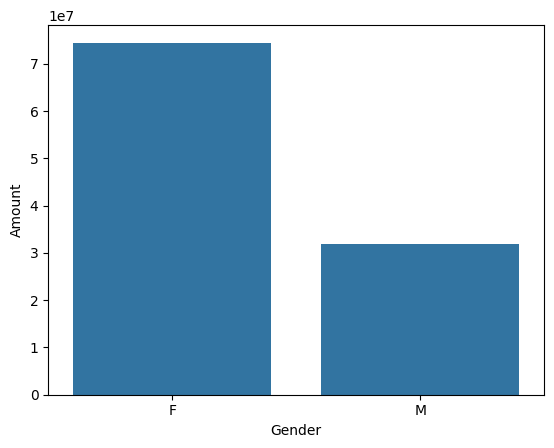

In [33]:
# groupby gender and sum of amount as sort with assending false 
sales_gen = df.groupby(['Gender'], as_index = False )['Amount'].sum().sort_values(by ='Amount', ascending=False)

# ploting the graph of between gender and amount 
sns.barplot(x='Gender', y='Amount', data=sales_gen)

# Now analysie on the basis of agegroup and gender
analyse the agegroup buyers on the basic of gender


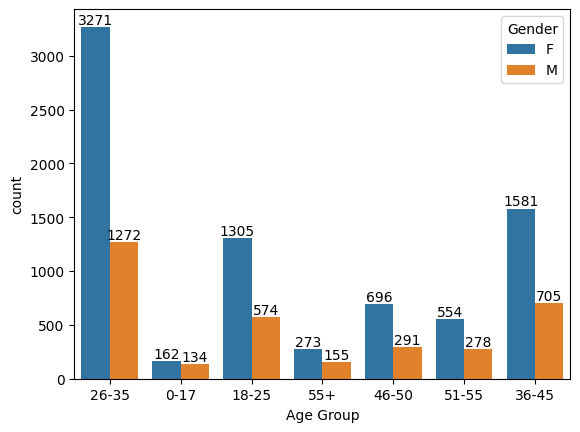

In [34]:
ax = sns.countplot(data = df , x = 'Age Group', hue ='Gender')
for bar in ax.containers:
    ax.bar_label(bar)

# Total amount vs  age 
we analyse total amount vs age group

C:\Users\Muneeb\AppData\Local\Temp\ipykernel_4036\4265635664.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='Age Group', x='Amount', data=sales_age, palette='viridis')


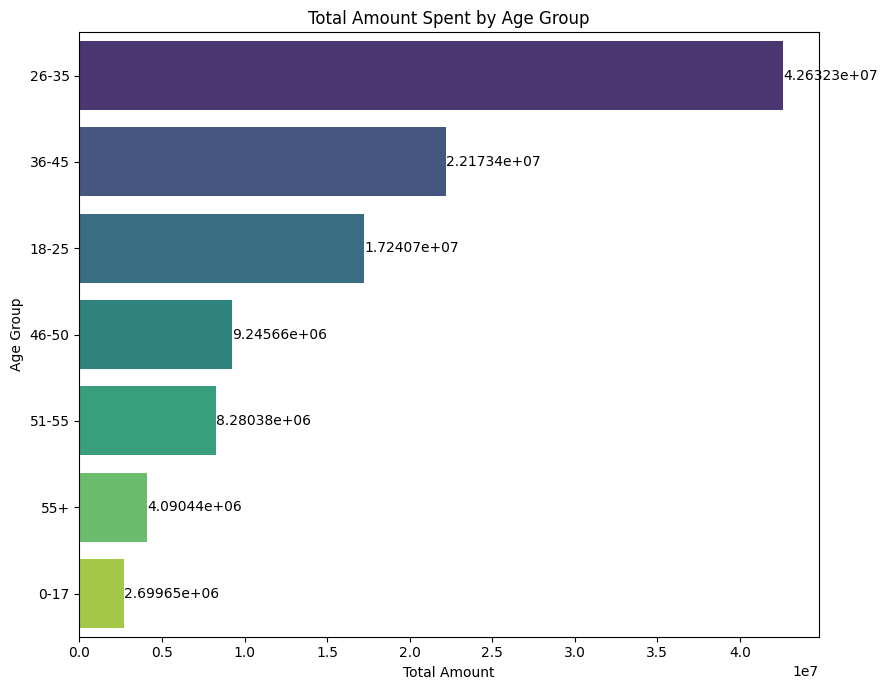

In [37]:
# Group by Age Group and sum the Amount
sales_age = df.groupby('Age Group', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(9,7))
ax = sns.barplot(y='Age Group', x='Amount', data=sales_age, palette='viridis')
ax.set_title('Total Amount Spent by Age Group')
ax.set_xlabel('Total Amount')
ax.set_ylabel('Age Group')
for bar in ax.containers:
    ax.bar_label(bar)
plt.tight_layout()
plt.show()

In [ ]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

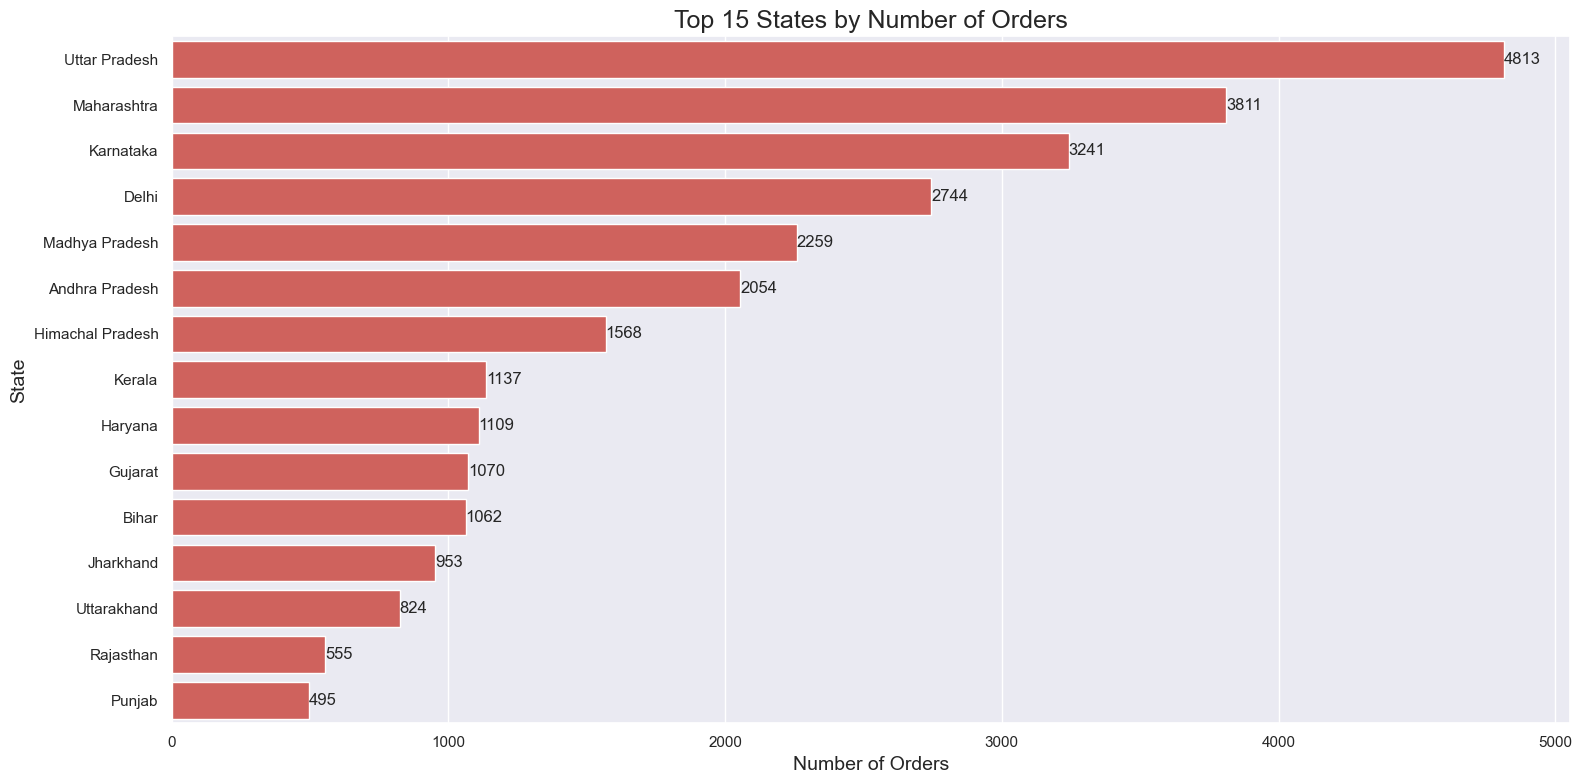

In [ ]:
# Horizontal bar plot for better readability with many states
plt.figure(figsize=(16,8))
sns.set_palette('Spectral')
ax = sns.barplot(
    data=sales_state, 
    y='State', 
    x='Orders', 
    orient='h'
)
ax.set_title('Top 15 States by Number of Orders', fontsize=18)
ax.set_xlabel('Number of Orders', fontsize=14)
ax.set_ylabel('State', fontsize=14)
for bar in ax.containers:
    ax.bar_label(bar)
plt.tight_layout()
plt.show()

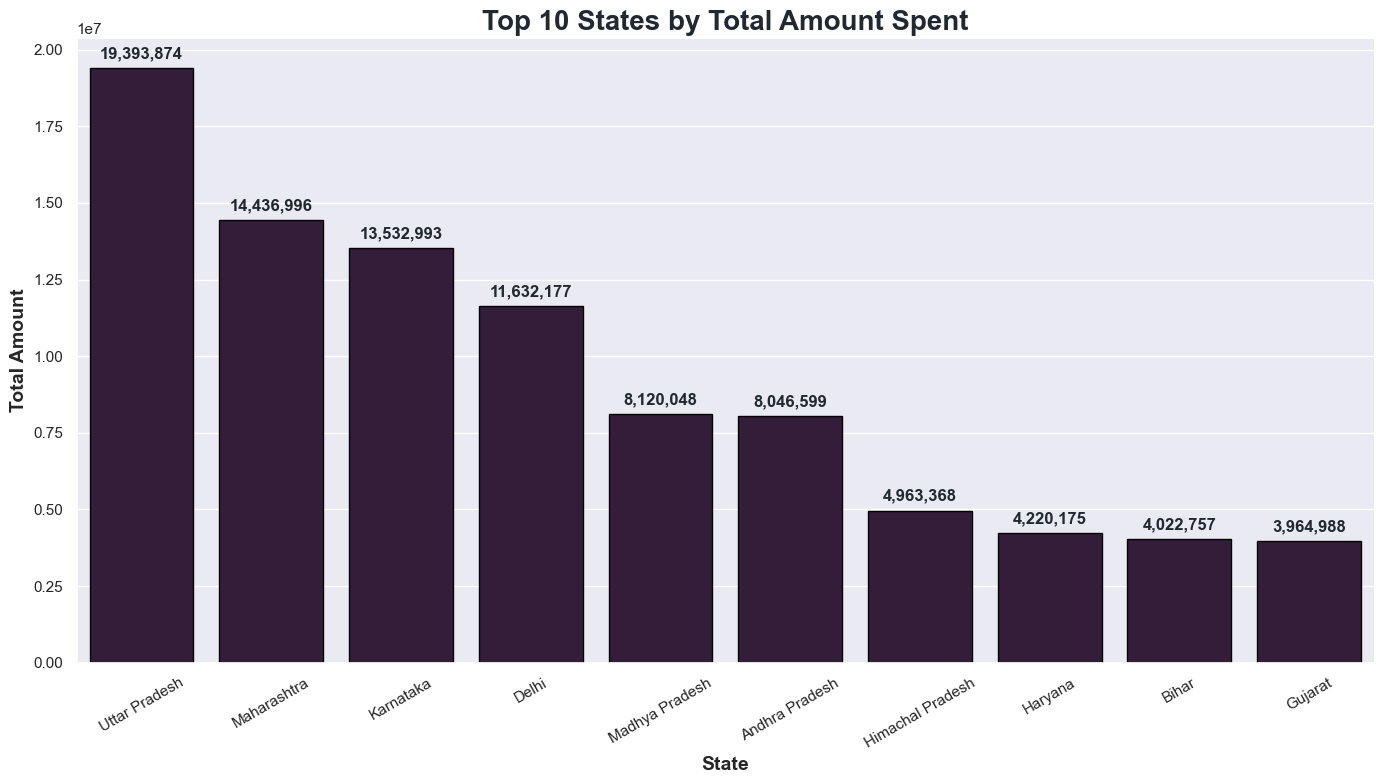

In [ ]:
plt.figure(figsize=(14, 8))
sns.set_palette('rocket')
ax = sns.barplot(
    data=sales_state,
    x='State',
    y='Amount',
    edgecolor='black'
)
ax.set_title('Top 10 States by Total Amount Spent', fontsize=20, fontweight='bold', color='#222831')
ax.set_xlabel('State', fontsize=14, fontweight='bold')
ax.set_ylabel('Total Amount', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=30)

# Add value labels above bars
for bar in ax.containers[0]:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=12, color='#222831', fontweight='bold')

sns.despine()
plt.tight_layout()
plt.show()

# Maritrial status 
analysing the work with maritrial status

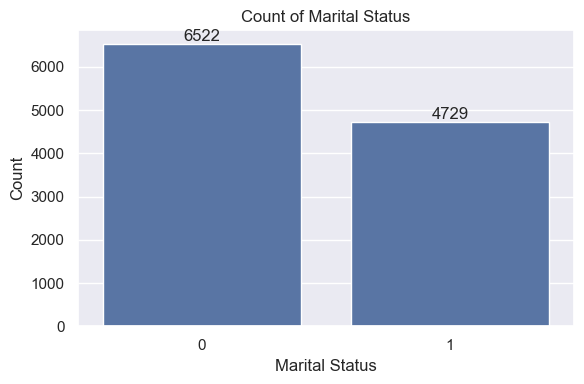

In [ ]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(data=df, x='Marital_Status')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# seeing this with the aspect of gender maritrial status and amout

analyse that with three columns amount gender shadi

<Axes: xlabel='Marital_Status', ylabel='Amount'>

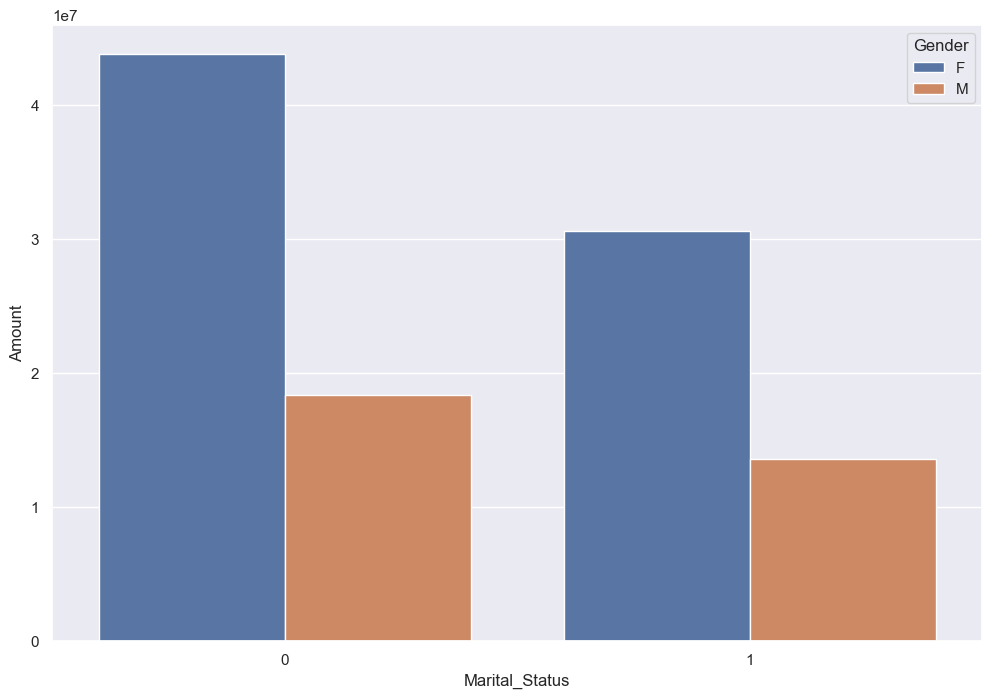

In [ ]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set({'figure.figsize':(12,8)})
sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')

# Occupition


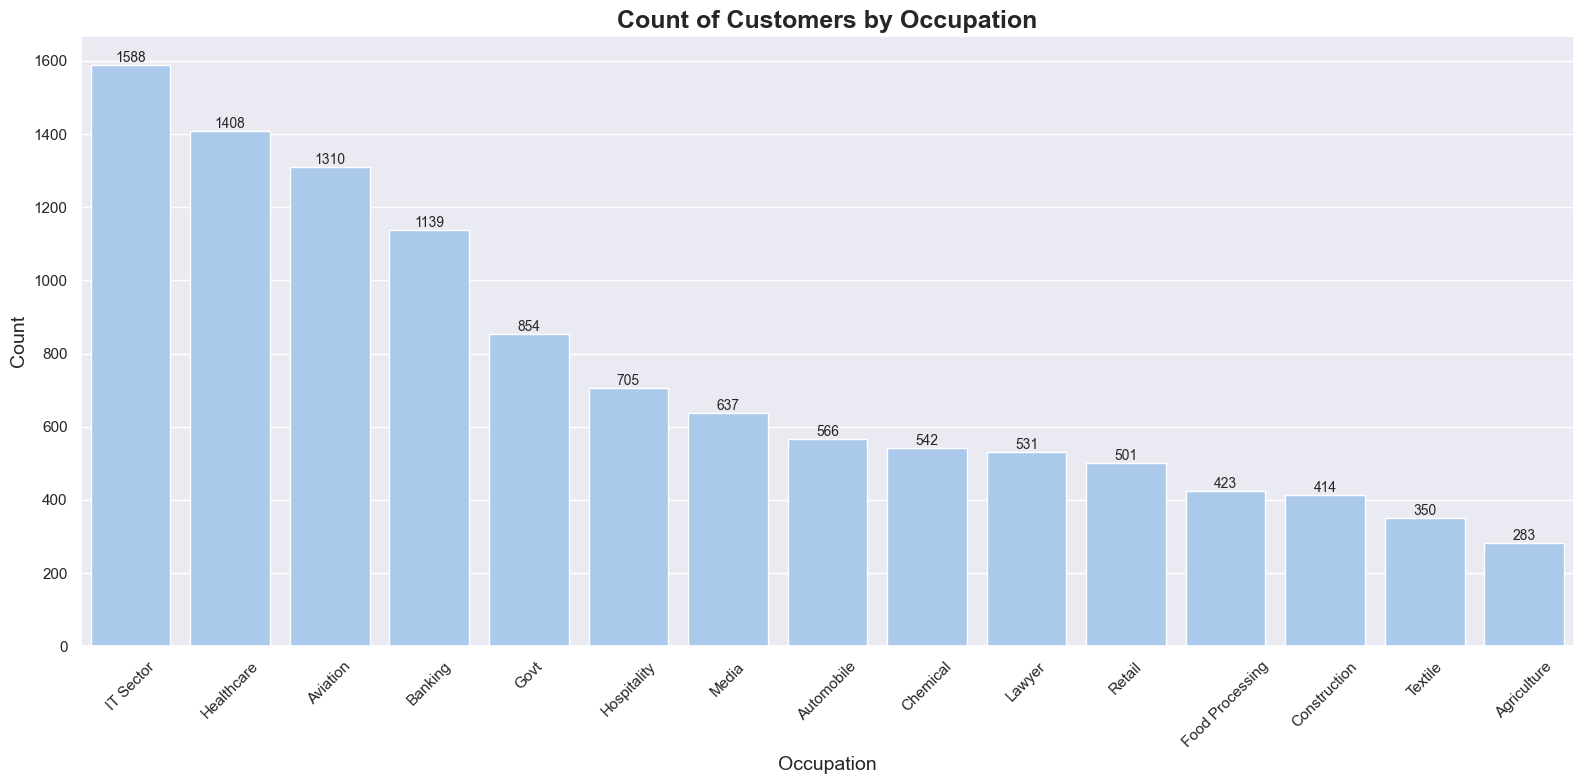

In [ ]:
plt.figure(figsize=(16, 8))
sns.set_palette('pastel')
ax = sns.countplot(data=df, x='Occupation', order=df['Occupation'].value_counts().index)
ax.set_title('Count of Customers by Occupation', fontsize=18, fontweight='bold')
ax.set_xlabel('Occupation', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='x', rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()

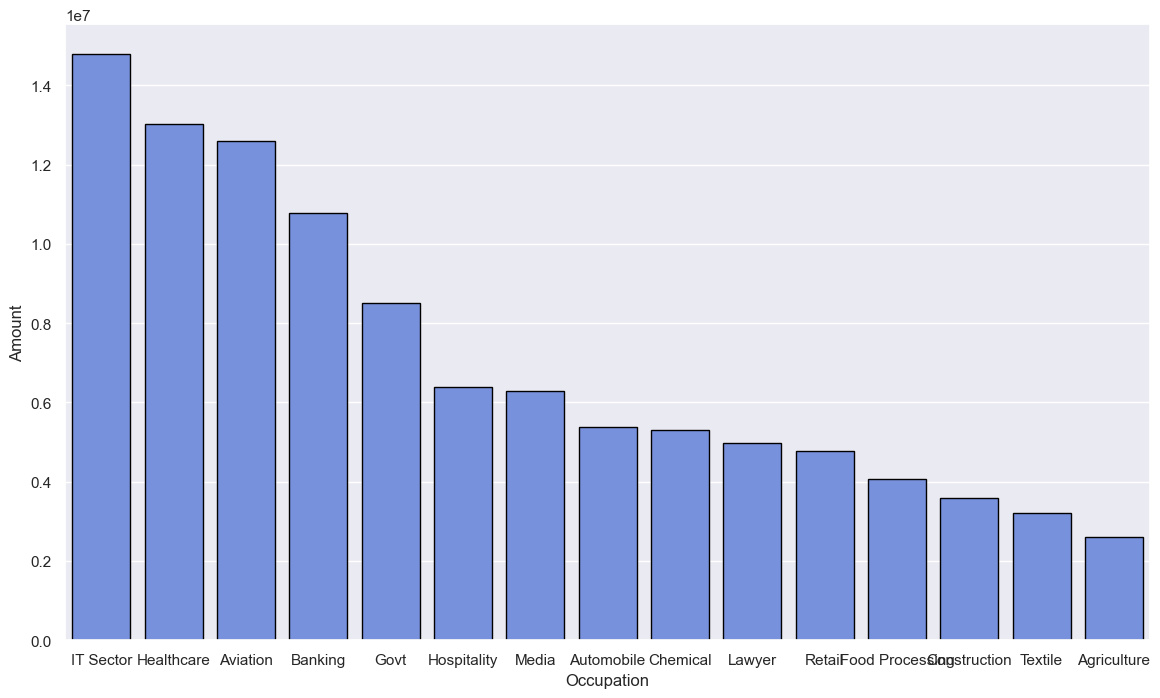

In [ ]:
# Occupition with amount 
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(14, 8))
sns.set_palette('coolwarm')
ax = sns.barplot(   
    data=sales_occupation,
    x='Occupation',
    y='Amount',
    edgecolor='black'
)

# Product catagry

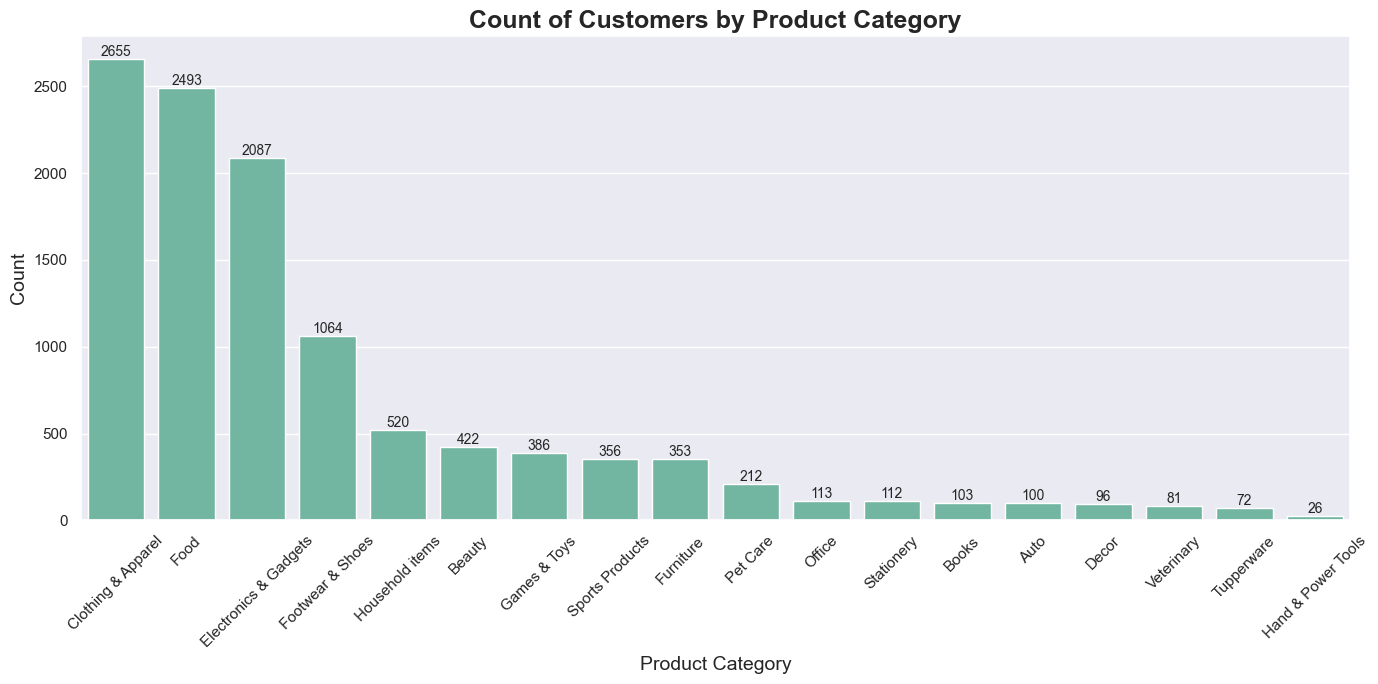

In [ ]:
# Count of customers by Product_Category
plt.figure(figsize=(14, 7))
sns.set_palette('Set2')
ax = sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().index)
ax.set_title('Count of Customers by Product Category', fontsize=18, fontweight='bold')
ax.set_xlabel('Product Category', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='x', rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()

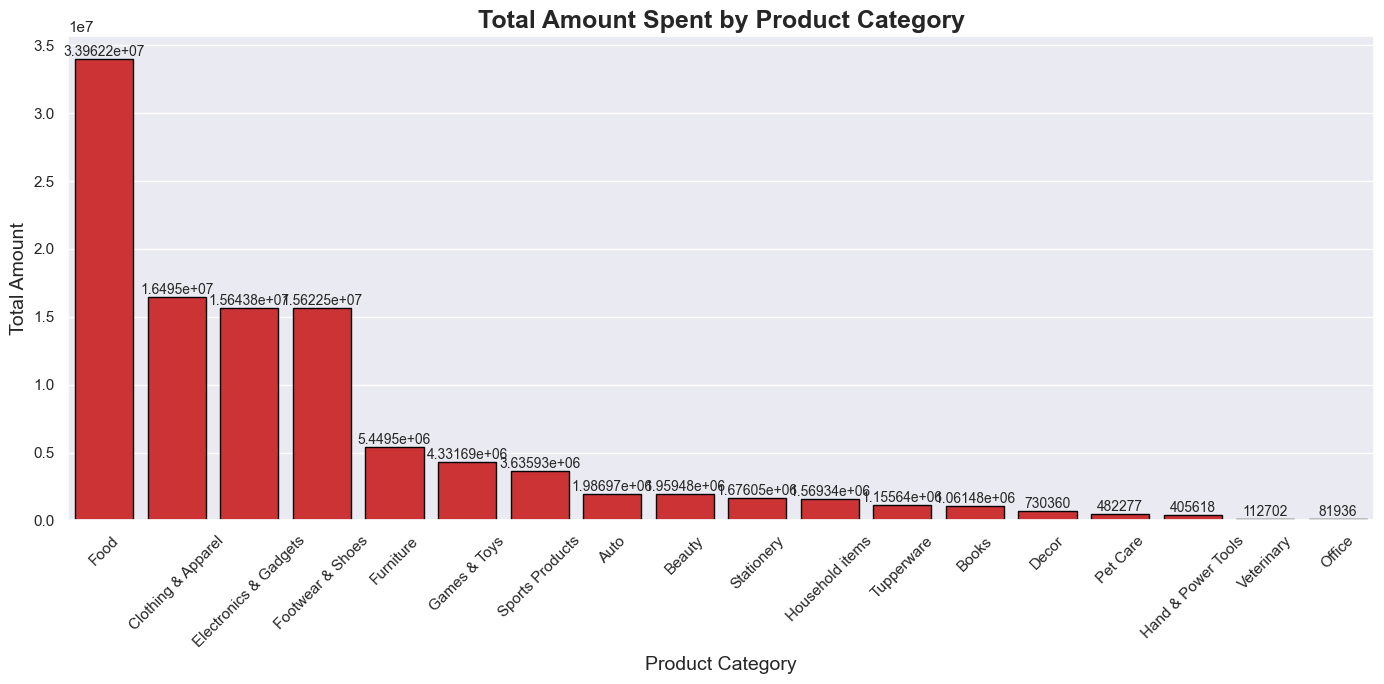

In [ ]:
# Group by Product_Category and sum the Amount
sales_product = df.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Plot the total amount spent by product category
plt.figure(figsize=(14, 7))
sns.set_palette('Set1')
ax = sns.barplot(data=sales_product, x='Product_Category', y='Amount', edgecolor='black')
ax.set_title('Total Amount Spent by Product Category', fontsize=18, fontweight='bold')
ax.set_xlabel('Product Category', fontsize=14)
ax.set_ylabel('Total Amount', fontsize=14)
ax.tick_params(axis='x', rotation=45)

# Add value labels above bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
#  see the columns of the data frame
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

C:\Users\Muneeb\AppData\Local\Temp\ipykernel_4036\3638611723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Cust_name', y='Amount', palette='crest')


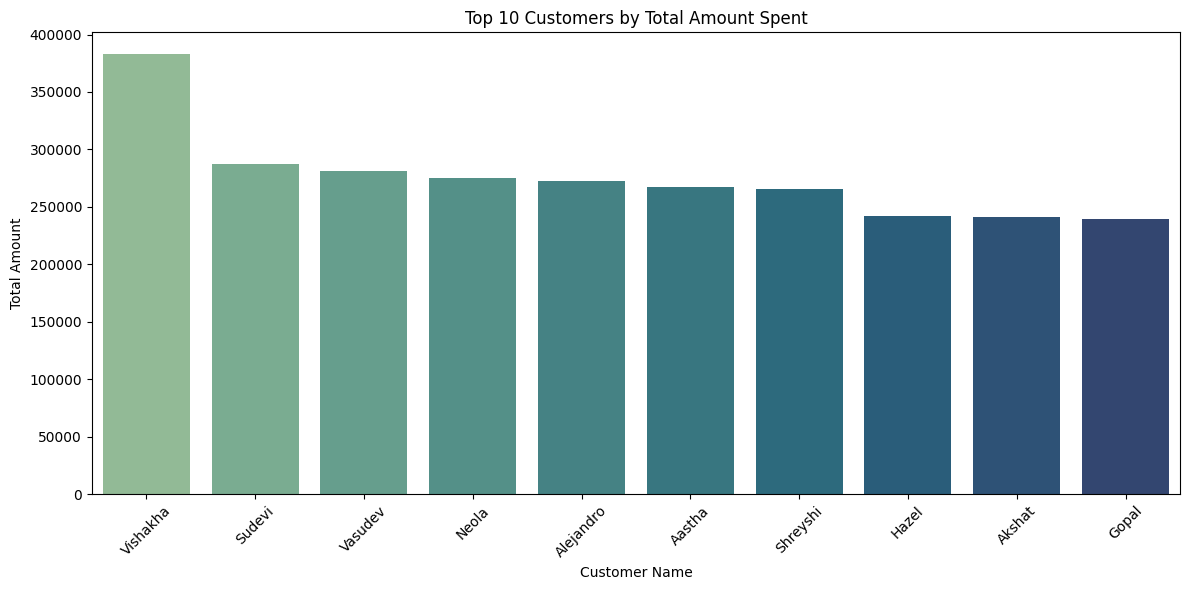

C:\Users\Muneeb\AppData\Local\Temp\ipykernel_4036\3638611723.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zone_orders, x='Zone', y='Orders', palette='mako')


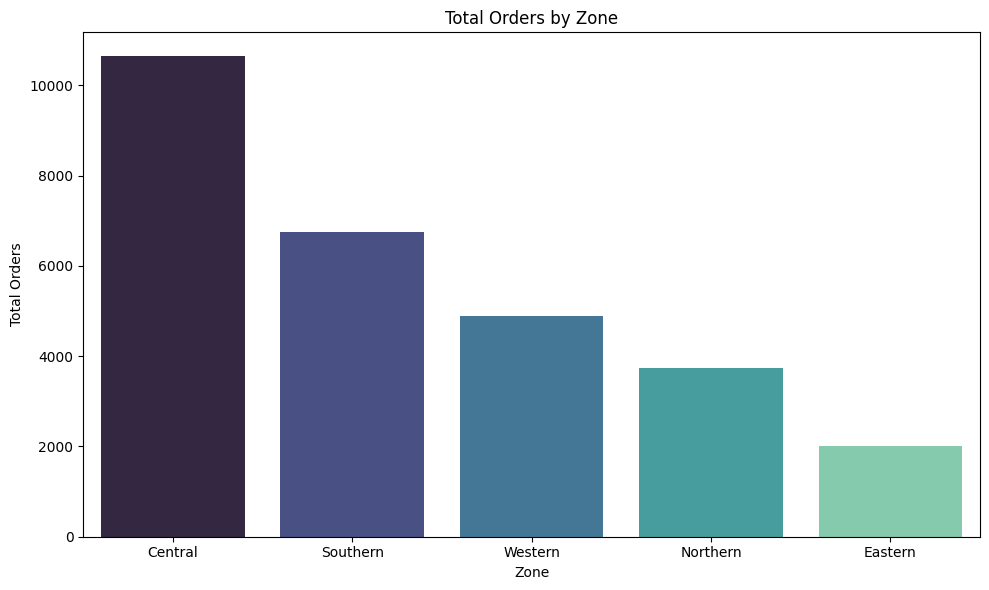

C:\Users\Muneeb\AppData\Local\Temp\ipykernel_4036\3638611723.py:26: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_order_value = df.groupby('State', as_index=False).apply(lambda x: x['Amount'].sum()/x['Orders'].sum() if x['Orders'].sum() > 0 else 0)
C:\Users\Muneeb\AppData\Local\Temp\ipykernel_4036\3638611723.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_order_value, x='State', y='AvgOrderValue', palette='flare')


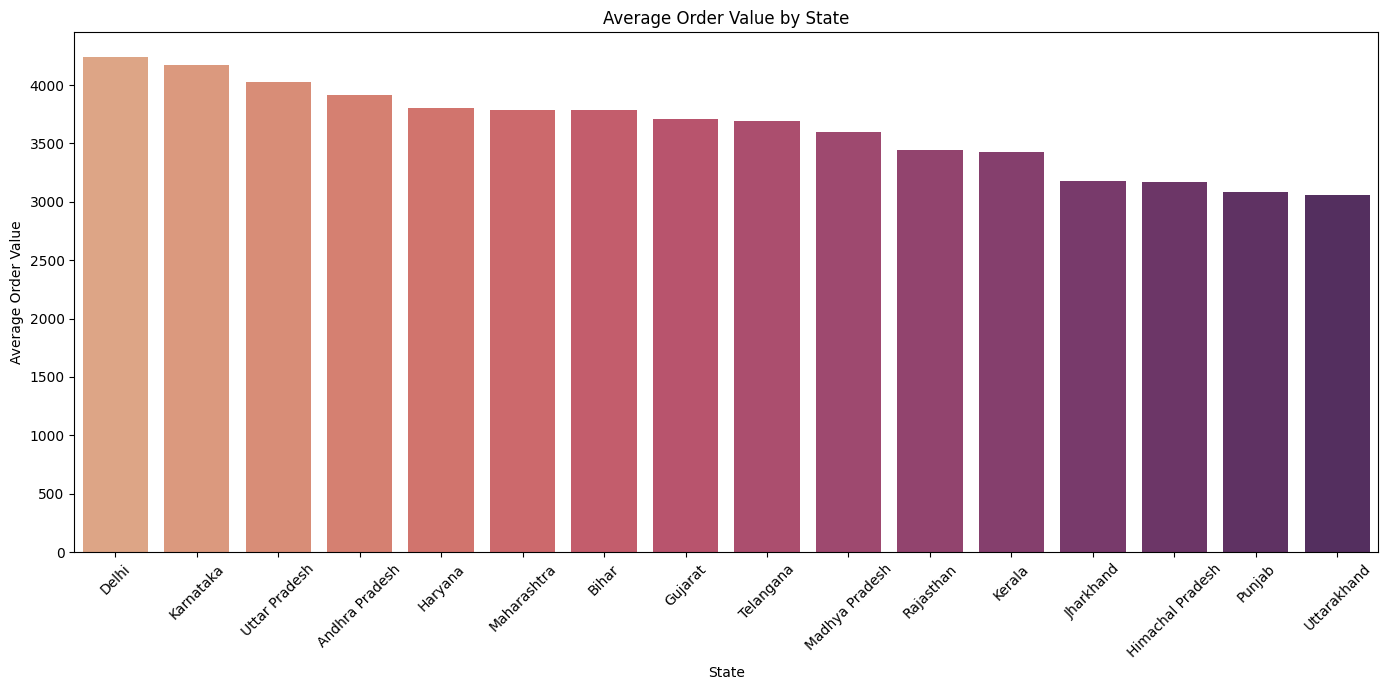

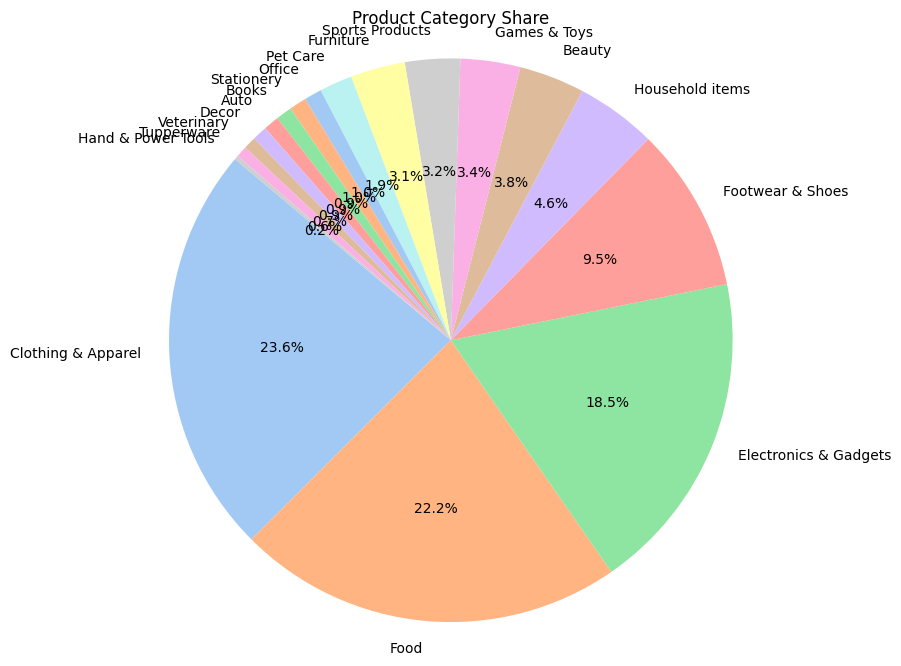

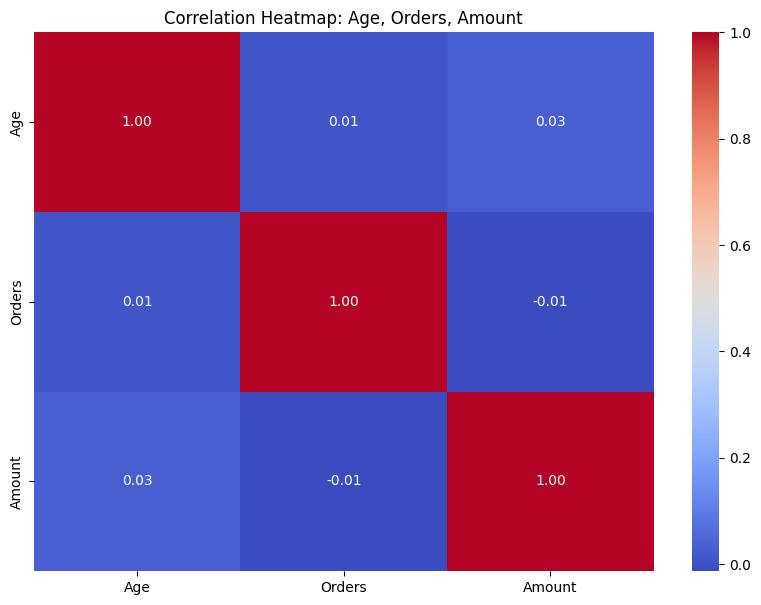

KPI Summary:
Total Revenue: 106,362,565
Total Orders: 28,007
Unique Customers: 1250
Average Order Value: 3797.71
Top State by Revenue: Uttar Pradesh
Top Product Category: Clothing & Apparel


In [36]:
# --- Additional EDA and KPI Visualizations ---

# 1. Top 10 Customers by Total Amount Spent
plt.figure(figsize=(12,6))
top_customers = df.groupby('Cust_name', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data=top_customers, x='Cust_name', y='Amount', palette='crest')
plt.title('Top 10 Customers by Total Amount Spent')
plt.xlabel('Customer Name')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Orders Distribution by Zone
plt.figure(figsize=(10,6))
zone_orders = df.groupby('Zone', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
sns.barplot(data=zone_orders, x='Zone', y='Orders', palette='mako')
plt.title('Total Orders by Zone')
plt.xlabel('Zone')
plt.ylabel('Total Orders')
plt.tight_layout()
plt.show()

# 3. Average Order Value by State
plt.figure(figsize=(14,7))
avg_order_value = df.groupby('State', as_index=False).apply(lambda x: x['Amount'].sum()/x['Orders'].sum() if x['Orders'].sum() > 0 else 0)
avg_order_value.columns = ['State', 'AvgOrderValue']
avg_order_value = avg_order_value.sort_values(by='AvgOrderValue', ascending=False)
sns.barplot(data=avg_order_value, x='State', y='AvgOrderValue', palette='flare')
plt.title('Average Order Value by State')
plt.xlabel('State')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Product Category Share (Pie Chart)
plt.figure(figsize=(8,8))
category_counts = df['Product_Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Product Category Share')
plt.axis('equal')
plt.show()

# 5. Correlation Heatmap for Numeric KPIs
plt.figure(figsize=(10,7))
sns.heatmap(df[['Age', 'Orders', 'Amount']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Age, Orders, Amount')
plt.show()

# --- KPI Summary ---
print('KPI Summary:')
print(f"Total Revenue: {df['Amount'].sum():,.0f}")
print(f"Total Orders: {df['Orders'].sum():,.0f}")
print(f"Unique Customers: {df['Cust_name'].nunique()}")
print(f"Average Order Value: {df['Amount'].sum()/df['Orders'].sum():.2f}")
print(f"Top State by Revenue: {df.groupby('State')['Amount'].sum().idxmax()}")
print(f"Top Product Category: {df['Product_Category'].value_counts().idxmax()}")